In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# FILL IN PATHS

session=3
reduced=True #true=200 ms, false=1s
inter_session_randomly=True

path=['','','']
if reduced:
  path[0]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_train_200ms.csv'
  path[1]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_valid_200ms.csv'
  path[2]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_test_200ms.csv'
else:
  path[0]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_train_1s.csv'
  path[1]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_valid_1s.csv'
  path[2]='/content/gdrive/Shared drives/Nikolina/RMS data/1D features/Inter-session/RMS_test_1s.csv'

In [ ]:
import h5py
import pandas as pd
import numpy as np
import scipy
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
def read_data(session_numb):
    """Function loads mat files, depending on session number from 1 to 5. 
    Note that it paths to mat files should be updated!
    Returns:
    sig_out - signals with shape: number of samples x 56
    targets_out - regression targets with shape: number of samples x 5 (for 5 fingers), 
    targets_out10 - the same as targets_out, but with fs=10 kHz, instead of 30 kHz. This
    one are going to be used as images will be downsampled as well.

    ------

    NOTE: There is a difference between read_data in this, and other scripts, because for NN 
    approach we use cleaned signals from session 3 (as artifact peak was causing problems). So we just read 
    sig_cleaned and corresponding targets. 
    """

    day16name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session1_10kHz.mat'
    day17name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session2_10kHz.mat'
    day20name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session3_10kHz.mat'
    day23name1='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session4_10kHz.mat'
    day23name2='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session5_10kHz.mat'

    
    c1=len(session_numb)
    c2=session_numb[0]
       
    if (1 in session_numb):
        fulldata     = h5py.File(day16name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]
        
        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==1:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)


    if (2 in session_numb):
        fulldata     = h5py.File(day17name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==2:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)

        
    if (3 in session_numb):
        fulldata     = h5py.File(day20name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig_cleaned"][:]#sifnals from session3 are additionaly cleaned!
        #t=fulldata['time'][:]
        targets=fulldata['targets_cleaned'][:]

        targets10=fulldata['targets10_cleaned'][:]
        targets10c=fulldata['targets10c_cleaned'][:]
        if c1==1 or c2==3:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
            
    if (4 in session_numb):
        fulldata     = h5py.File(day23name1)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==4:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
       
        
    if (5 in session_numb):
        fulldata     = h5py.File(day23name2)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==5:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
     
    return sig_out, targets_out, targets_out10, targets_out10c

In [ ]:
(t_data, t_targets, downs_targets,downs_targetsc)=read_data([session])# training sessions
print('data: ', np.shape(t_data))
print('targets: ', np.shape(t_targets))
print('targets10: ', np.shape(downs_targets))
print('targets10c: ', np.shape(downs_targetsc))
t_data=np.transpose(t_data)
t_targets=np.transpose(t_targets)
downs_targets=np.transpose(downs_targets)
downs_targetsc=np.transpose(downs_targetsc)
print('transposed data: ', np.shape(t_data))
print('transposed targets: ', np.shape(t_targets))
print('transposed targets10: ', np.shape(downs_targets))
print('transposed targets10c: ', np.shape(downs_targetsc))

data:  (5850000, 56)
targets:  (5850000, 5)
targets10:  (1950000, 5)
targets10c:  (1950000, 9)
transposed data:  (56, 5850000)
transposed targets:  (5, 5850000)
transposed targets10:  (5, 1950000)
transposed targets10c:  (9, 1950000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


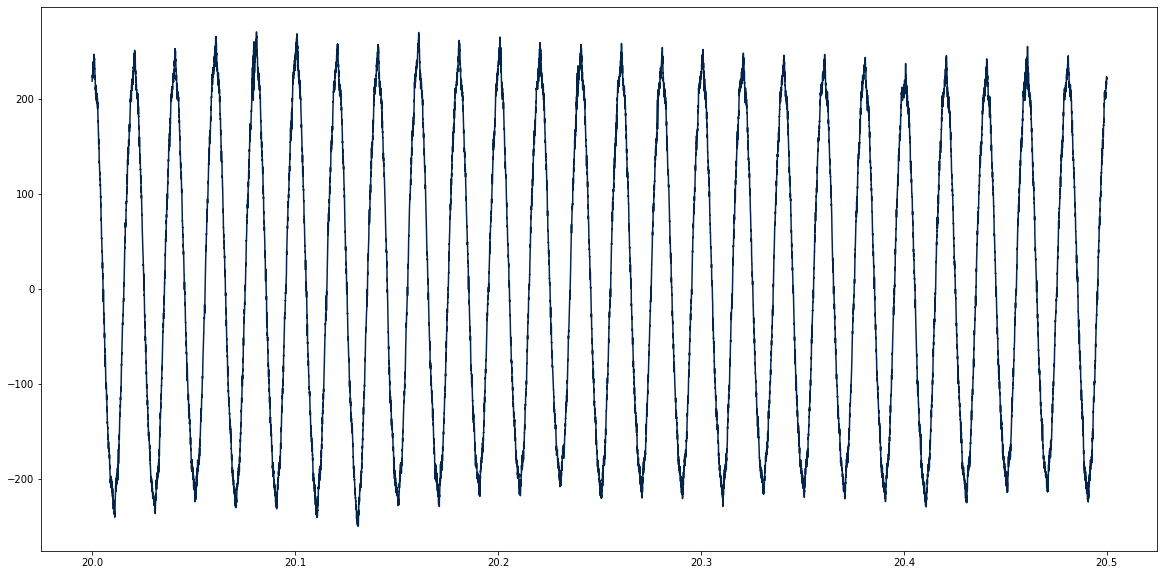

In [ ]:
fs=30000
t=np.arange(20*fs,int(20.5*fs))/fs
plt.figure(figsize=(20,10))
plt.plot(t,t_data[0,20*fs:int(20.5*fs)],color='#03254c')
plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/original500ms.png')

In [ ]:
downs_data=np.zeros((56,int(np.shape(t_data)[1]/3)))
for channel in range(0,56):
  downs_data[channel,:]=scipy.signal.decimate(t_data[channel,:], 3)

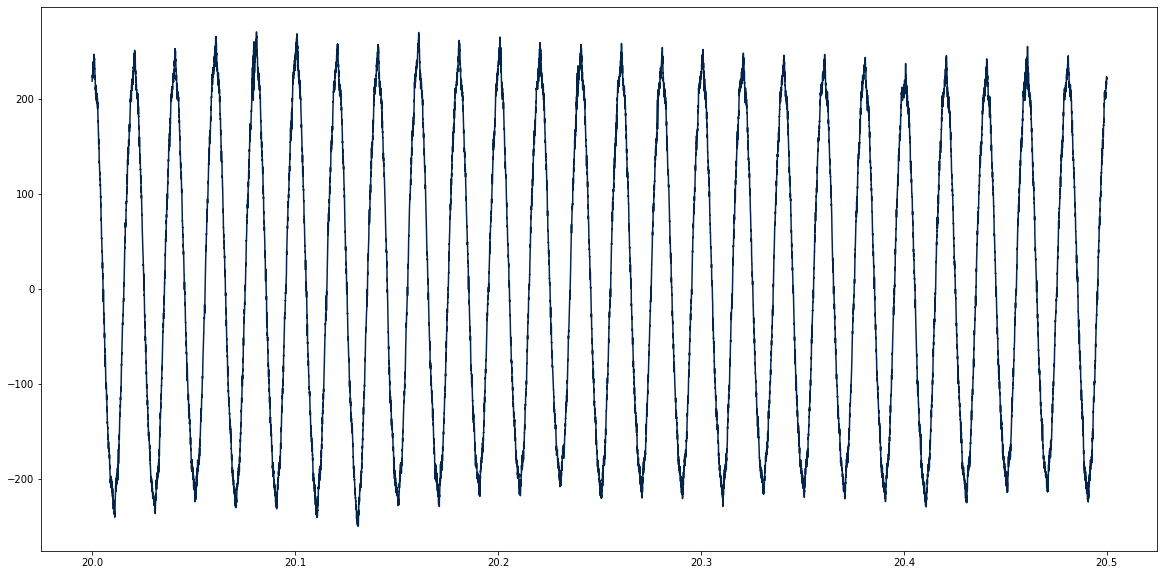

In [ ]:
fs=30000
t=np.arange(20*fs,int(20.5*fs))/fs
plt.figure(figsize=(20,10))
plt.plot(t,t_data[0,20*fs:int(20.5*fs)],color='#03254c')
plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/downsampled500ms.png')